<a href="https://colab.research.google.com/github/jorge-puentes-b/RegrecionLogis/blob/main/TP1/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Age                BMI  BloodPressure  Glucose            Insulin  Outcome
0   56  37124958913082000             83      147  37195511891017800        0
1   69  28256628315872500            122      159  21643902491999300        1
2   46  26025804043704000            133       90     27721087677108        0
3   32   2511213624204620            116      123   9214482722599330        1
4   60  29310693985836600             67      172  12059005956196100        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            2000 non-null   int64
 1   BMI            2000 non-null   int64
 2   BloodPressure  2000 non-null   int64
 3   Glucose        2000 non-null   int64
 4   Insulin        2000 non-null   int64
 5 

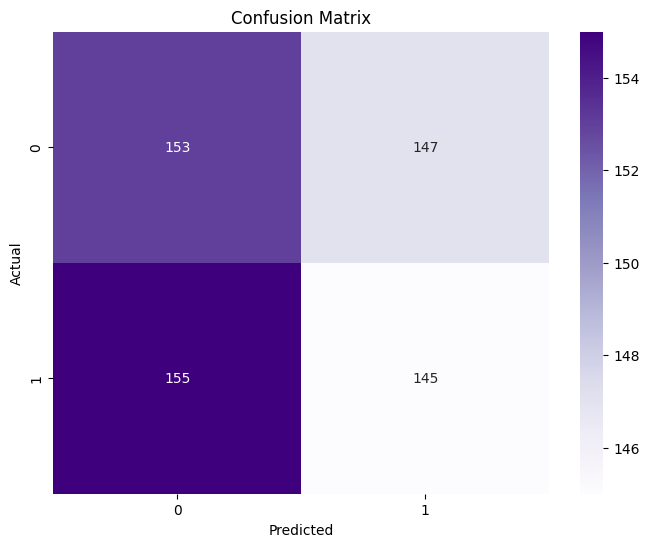

              precision    recall  f1-score   support

           0       0.50      0.51      0.50       300
           1       0.50      0.48      0.49       300

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600

Exactitud del modelo: 49.67%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from google.colab import drive


import statsmodels.api as sm

drive.mount('/content/drive')


archivo_excel = ('/content/drive/MyDrive/Diabetes.xlsx')


data = pd.read_excel(archivo_excel)

print(data.head())
print(data.info())
print(data.describe())

data = data.drop('BMI', axis=1)
data['Outcome'] = data['Outcome'].apply(lambda x: 1 if x > 0 else 0)

X = data.drop('Outcome', axis=1)  # Características: Age, Income, Clicks, Previous Purchases
y = data['Outcome']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

#logistic_model =  LogisticRegression()
logistic_model = LogisticRegression(class_weight='balanced', random_state=0)
logistic_model.fit(x_train_scaled, y_train)

y_pred = logistic_model.predict(x_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

print ("Predicted vs Current Number")
for current, predicted in zip(y_test, y_pred):
   print (f"Current: {current:.2f}, Predicted: {predicted: .2f}")

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

accuracy =accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy*100:.2f}%')